CONTAR A HISTORIA DO PROJETO AQUI 

Importando bibliotecas necessarias para manipualçao de dados


In [197]:
import pandas as pd
import numpy as np
import requests
import urllib.request
import os
from glob import glob

#Visualização de Dados
import seaborn as sns
import matplotlib.pyplot as plt 



from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

Extração de dados 


Nesta etapa, faremos a aquisição de dados na pagina web https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018, que disponibiliza dados abertos da Agência Nacional de Aviação Civil 
(ANAC), que contempla todos os voos regulares ativos (VRA) das companhias aéreas, para o ano de 2018. 

Os dados estão disponiveis em cojuntos de dados .csv e são referentes aos meses de janeiro a dezembro de 2018. 
Para fazer a aquisição de dados no site, alocaremos em ums estrutura tipo dicionario informações sobre nome do arquivo e os ite correspondente.

os links estão são referentes a requisições dos arquivos mensais que são disnibilizados separadamente.

In [11]:

arquivos_meses2018 = {
    "vra_122018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_122018.csv",
    "vra_112018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_112018.csv",
    "vra_102018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_102018.csv",
    "vra_092018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_092018.csv",
    "vra_082018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_082018.csv",
    "vra_072018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_072018.csv",
    "vra_062018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_062018.csv",
    "vra_05.csv": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_05.csv",
    "vra_04.csv": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_04.csv",
    "vra_032018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_032018.csv",
    "vra-02_2018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra-02_2018.csv",
    "vra-01_2018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra-01_2018.csv"
}




Para este desafio vamos utilizar a base de dados aberta da Agência Nacional de Aviação Civil 
(ANAC), que contempla todos os voos regulares ativos (VRA) das companhias aéreas, para o 
ano de 2018. Como os dados são abertos, não faremos uso de dados de login, senha, e token de liberação de dados.

A biblioteca foi necessaria pois os os linkds de acesso disponilizam os dados em uma nova pagina e nao em quivos para download, com o resquests podemos acessar a transação de pacote e fazer download direto do nosso projeto e disponibilizar em uma pasta específica. 

Como se tratam de vários (aqarquivos_meses2018), optamos por percorrer a lista passando um link por iteração para download e enviando para um destino especificado no computador.

Caso precise fazer download dos dados em seu computador, use 'caminho_destino' para especificar a pasta de destino dos aquivos.

In [12]:
#fazendo requisição dos aquivos
#utilizando a biblioteca requests para acessar o pacote de dados que precisamos para manipulação 


for i, url_arquivo in enumerate(arquivos_meses2018.values(), start=1):
    caminho_destino = 'C:\\Users\\tonho\\OneDrive\\Documentos\\portifoliodedados\\webscaping\\PortifolioDeDados\\caseGOL\\{}.csv'.format(list(arquivos_meses2018.keys())[i-1])
    # response = requests.get(url_arquivo)
    with open(caminho_destino, 'wb') as file:
        file.write(requests.get(url_arquivo).content)
        print(f"Arquivo {i} baixado em: {caminho_destino}")


Arquivo 1 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_122018.csv
Arquivo 2 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_112018.csv
Arquivo 3 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_102018.csv
Arquivo 4 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_092018.csv
Arquivo 5 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_082018.csv
Arquivo 6 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_072018.csv
Arquivo 7 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_062018.csv
Arquivo 8 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL

Acessando arquivos 

 


Patra o nosso import de dados, usaremos a função glob.glob que é uma função em Python que é usada para encontrar todos os caminhos de arquivo correspondentes a um padrão especificadp. Em nosso caso, usamos o caminho de destino dos arquivos baixados e um '\*.csv')' ao final, para especificar que queremos todos os arquivos de extensão csv daquela página

In [5]:

import glob
Lista_meses2018_original= glob.glob(r'C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\*.csv')
# 'arquivos' agora é um array com o nome de todos os .csv que começam com 'arquivo'
lista_df_meses2018 = []
for arquivo_mes in Lista_meses2018_original:
   lista_df_meses2018.append(pd.read_csv(arquivo_mes,sep=';' , encoding='latin-1'))



C:\Users\tonho\AppData\Local\Temp\ipykernel_2652\1501066348.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lista_df_meses2018.append(pd.read_csv(arquivo_mes,sep=';' , encoding='latin-1'))
C:\Users\tonho\AppData\Local\Temp\ipykernel_2652\1501066348.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lista_df_meses2018.append(pd.read_csv(arquivo_mes,sep=';' , encoding='latin-1'))
C:\Users\tonho\AppData\Local\Temp\ipykernel_2652\1501066348.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lista_df_meses2018.append(pd.read_csv(arquivo_mes,sep=';' , encoding='latin-1'))


Para garantir que todas a colunas que de mesm antureza tenham o memso nome, renomearemos as colunas 'Código DI' de alguns datasets para 'Código Autorização (DI)', que é o nme da mesma coluna na maioria dos dadasets.
 Essa operação foi necessária pois a diferença de nomes gera conflito ao fazemos junções dos conjuntos de dados, o que será necessário para facilitar na manipulação dos datsets e na construção de análises anuais/mensais.

In [6]:
for i, df_mes in enumerate(lista_df_meses2018):
    if 'Código DI' in df_mes.columns:
        lista_df_meses2018[i] = df_mes.rename(columns={'Código DI': 'Código Autorização (DI)'})

Ao fazer a concatenação de todos os dasets na lista de arquivos 'lista_df_meses', usamos ignore_index=True para que os indices do novo dataset, com todas as instancias do ano de 2018, tenham indices com valores ordinais que contempelem a dimensão do dataset.

In [7]:
datasets2018_original= pd.concat(lista_df_meses2018, ignore_index=True)

In [10]:
#analisando a existencia de dados/linhas duplucadas
datasets2018_original.duplicated().sum()

0

In [9]:
#removendo linhas duplucadas no cojunto de dados
datasets2018_original.drop_duplicates(inplace=True)

Para garantir uma análise de contexto nacional, faremos um filtro de voos operados por GOL, AZUL E LATAM que sejam do tipo N- Nacional. desconsiderando a coluna 'Código Justificativa'

In [11]:
datasets2018_original = datasets2018_original[datasets2018_original['ICAO Empresa Aérea'].isin(['GLO','AZU','TAM']) & datasets2018_original['Código Tipo Linha'].isin(['N'])]

In [610]:
#garantindo a organização dos indices do dataset
datasets2018_original= datasets2018_original.reset_index(drop=True)

Excluindo coluna que não será utilizada para esta analise, o inplace= True garante que alteração sej afeota diretamente no dataset sem precisar criaer uma copia 

In [13]:
datasets2018_original.drop('Código Justificativa', axis= 1, inplace= True)

Verificando a persistencia de valores nulos e exibindo a soma de valores nulos por coluna

In [14]:
datasets2018_original.isnull().sum()

ICAO Empresa Aérea             0
Número Voo                     0
Código Autorização (DI)       82
Código Tipo Linha              0
ICAO Aeródromo Origem          0
ICAO Aeródromo Destino         0
Partida Prevista            8284
Partida Real               17455
Chegada Prevista            8284
Chegada Real               17455
Situação Voo                   0
dtype: int64

Para facilitar a analise e manipulação dos dados, converteremos os campos com dados de horarios de partida (origem ) e chegada(destino) em colunas do tipo pd.dateTime 

In [16]:

# Lista de colunas que devem ser convertidas para datetime
datasets2018_original['Partida Prevista'] = pd.to_datetime(datasets2018_original['Partida Prevista'], errors='coerce', format='%d/%m/%Y %H:%M')
datasets2018_original['Partida Real'] = pd.to_datetime(datasets2018_original['Partida Real'], errors='coerce', format='%d/%m/%Y %H:%M')
datasets2018_original['Chegada Prevista'] = pd.to_datetime(datasets2018_original['Chegada Prevista'], errors='coerce', format='%d/%m/%Y %H:%M')
datasets2018_original['Chegada Real'] = pd.to_datetime(datasets2018_original['Chegada Real'], errors='coerce', format='%d/%m/%Y %H:%M')


Para garantir a existencia de um dataset com dados originais e nao perdermos informações ao manipular os dados, faremos a copia do dataset original. O dataset original sera usado no caso de análises de voos não realizados e afins, já o novo dataset 'datasets_voos_2018' terá colunas missing removidas para facilitar a manipulação de dados e a geração de modelos de Machine Learning.

In [19]:
#fazendo copia de dataset original.
datasets_voos_2018= datasets2018_original.copy()

In [20]:
datasets_voos_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631627 entries, 0 to 631626
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ICAO Empresa Aérea       631627 non-null  object        
 1   Número Voo               631627 non-null  object        
 2   Código Autorização (DI)  631545 non-null  object        
 3   Código Tipo Linha        631627 non-null  object        
 4   ICAO Aeródromo Origem    631627 non-null  object        
 5   ICAO Aeródromo Destino   631627 non-null  object        
 6   Partida Prevista         623343 non-null  datetime64[ns]
 7   Partida Real             614172 non-null  datetime64[ns]
 8   Chegada Prevista         623343 non-null  datetime64[ns]
 9   Chegada Real             614172 non-null  datetime64[ns]
 10  Situação Voo             631627 non-null  object        
dtypes: datetime64[ns](4), object(7)
memory usage: 53.0+ MB


In [21]:
datasets_voos_2018["Situação Voo"].value_counts()

Situação Voo
REALIZADO    614172
CANCELADO     17455
Name: count, dtype: int64

Levando em consideração que o calculo do tempo de atraso (grantia de existencia de atraso), depende da variável "Partida Prevista" assim como da "Partida Real", excluíremos as colunas em que estas informações nao aparecem. Optamos pela eclusão neste monento, mas em projetos futuros podemos usalas como forma de avaliar o modelo a partir de outras caracteristicas.

Não faremo, nesta etapa, a substituição de valores NaN pois precisamoscontar com a precisão dos valores tempotrais para garantia da existencia de possiveis atrasados.

In [22]:
#remoção de colunas com partida prevista vazia
datasets_voos_2018[(datasets_voos_2018["Partida Prevista"].isnull()) & (datasets_voos_2018["Chegada Prevista"].isnull())].shape

(8284, 11)

No caso de 'Partida Real' vazia, adotamso este voo como Cancelado e removemdos do conjunto para esta análise.

In [23]:
#remoção de colunas com partida Real vazia
datasets_voos_2018[(datasets_voos_2018["Partida Real"].isnull()) & (datasets_voos_2018["Chegada Real"].isnull())& (datasets_voos_2018['Situação Voo']== 'CANCELADO')].shape

(17455, 11)

Alguns voos, mesmo que nao cancelados, nao continham dados sobre horário de partida prevista, assim como os cancelados.

In [ ]:
#para enrender o dados sobre voos cancelados.
#datasets_voos_2018[datasets_voos_2018['Situação Voo']== 'CANCELADO'].head()

In [25]:
datasets_voos_2018[datasets_voos_2018["Chegada Real"].isnull()].shape#

(17455, 11)

In [26]:
#removendo voos cancelados
datasets_voos_2018.drop(datasets_voos_2018[datasets_voos_2018['Situação Voo']== 'CANCELADO'].index, inplace= True)
#df = df.drop(df[df['product_name'] == 'Coca Cola'].index)

In [28]:
#datasets_voos_2018[(datasets_voos_2018["Partida Prevista"].isnull()) & (datasets_voos_2018["Chegada Prevista"].isnull())].shape

(8284, 11)

Removeno nulidades da coluna 'Chegada Prevista'

In [29]:
datasets_voos_2018.drop(datasets_voos_2018[datasets_voos_2018['Chegada Prevista'].isnull()].index, inplace= True)

In [ ]:
datasets_voos_2018.info()

dropna(inplace =True) será usado para remoção de dados faltantes. 

optamos pela remoção por dois motivos: 1- os dados faltantes nao correspondiam a mais do que 10% dos dados analisados, 2- como se trata da analise de dados temporais, a remoção pode ajudar na garantia da precisão dos dados utilizados já que não serão substituídos.

#datasets2018_original.isna().sum() - para analisar se os dados faltantes permancem no dataset e nos garantir que um novo conjunto de dados foi criado.

- Preparando as colunas com inforomações de horario de 'Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real'.
As colunas estão dispostas no formato data e hora, contudo no tipo object. A conversão para o tipo to_datetime vai facilitar na manipulação desses dados para geração de informações como as de pontualidade.

- Criando uma coluna "Status horario voo". Essa coluna vai guardar a indicação de voo "atrasado==1" ou "pontual == 0"

- A construção dessa coluna será baseada em:
Um voo pode ser dado como pontual ou atrasado, levando-se em conta apenas os dados de 
“Partida Prevista somando 15 minuto” (Paertida_prevista + 15) e “Partida Real”, sendo:
Se Partida Real > Partida Prevista + 15 minutos → Voo atrasado (1)
Se Partida Real <= Partida Prevista + 15 minutos → Voo pontual(0)



No códi bauxo, a clausula where, noa juda a aidionar um valor quando a condição estabelecidada for verdadeira, e um segundo valor quando a condição for falsa. neste caso usaremos 0 e 1
where(
    datasets_voos_2018['Partida Real'] > (datasets_voos_2018['Partida Prevista'] + pd.Timedelta(minutes=15)),
    1,  0)


As condições são baseadas na existencia de um valor da linha na linha 'Partida Real' o que pode servir como premissa de garantia de que o voo realmente aconteceu.

In [35]:
# Supondo que 'Status horario voo' seja uma coluna existente em datasets_voos_2018

"""""
for i, row in datasets_voos_2018.iterrows():
    if row['Partida Real'] > row['Partida Prevista'] + pd.Timedelta(minutes=15):
        #Voo atrasado (1)
        datasets_voos_2018.at[i, "Status horario voo"] = 1    
    elif row['Partida Real'] <= row['Partida Prevista'] + pd.Timedelta(minutes=15): 
        # Voo pontual(0)
        datasets_voos_2018.at[i, "Status horario voo"] = 0
    elif pd.isna(row['Partida Real']):
        datasets_voos_2018.at[i, "Status horario voo"] = np.nan
"""

# Criação de uma nova coluna com base em duas colunas existentes
datasets_voos_2018['Status horario voo'] = np.where(
    datasets_voos_2018['Partida Real'] > (datasets_voos_2018['Partida Prevista'] + pd.Timedelta(minutes=15)),
    1,  0)  # Se a condição for verdadeira
    #np.where(
    #    datasets_voos_2018['Partida Real'] <= datasets_voos_2018['Partida Prevista'] + pd.Timedelta(minutes=15),
     #   0,  # Se a segunda condição for verdadeira
     #   datasets_voos_2018  # Caso contrário (outras situações)
  

  

Adicionar NaN ou NaT no dataset pode gerar ruídos e dificultar na concatenção dos cojuntos de dados, alem disso, .iterrows() pode ser muito custo em termos de custo computacional

In [36]:
datasets_voos_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605888 entries, 15 to 631626
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ICAO Empresa Aérea       605888 non-null  object        
 1   Número Voo               605888 non-null  object        
 2   Código Autorização (DI)  605806 non-null  object        
 3   Código Tipo Linha        605888 non-null  object        
 4   ICAO Aeródromo Origem    605888 non-null  object        
 5   ICAO Aeródromo Destino   605888 non-null  object        
 6   Partida Prevista         605888 non-null  datetime64[ns]
 7   Partida Real             605888 non-null  datetime64[ns]
 8   Chegada Prevista         605888 non-null  datetime64[ns]
 9   Chegada Real             605888 non-null  datetime64[ns]
 10  Situação Voo             605888 non-null  object        
 11  Status horario voo       605888 non-null  int32         
dtypes: datetime64[ns](4)

INICIANDO ANALISE EXPLORATORIA

In [40]:
df_corr_voos2018 = datasets_voos_2018[['Partida Prevista','Partida Real','Chegada Prevista','Chegada Real','Status horario voo']]

In [917]:
#dados_janeiro = datasets_voos_2018[(datasets_voos_2018['Partida Real'].dt.month ==1) & (datasets_voos_2018['Partida Real'].dt.year == 2018)]
#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()

Para ententer a a projeção de voos pontuais das compnhias areas e como a GOL está posiconada nesta situação frente às demais, faremos uma analise em forma de série temporal fazendo um comparativo de número de voos pontuais mês a mês de cada compnhia. 

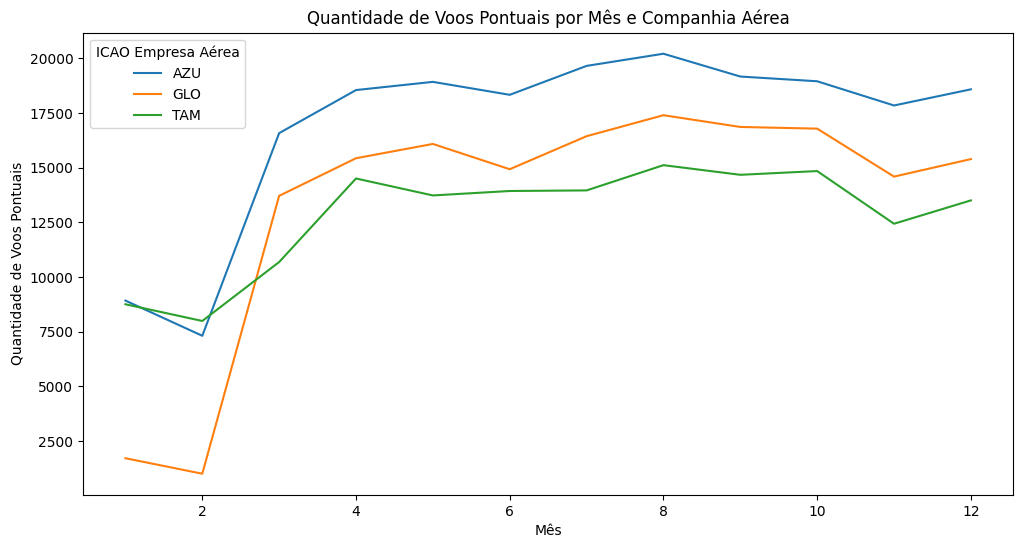

In [44]:
datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month
voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['Status horario voo'] == 0].groupby(['Mes_Partida', 'ICAO Empresa Aérea']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=voos_pontuais_por_mes_companhia)
plt.title('Quantidade de Voos Pontuais por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Pontuais')
plt.show()


Pode-se observar que a GOL ainda nao se encotra posicionada à frente das outras compnhias e tem o menor desempenho no aspecto em datas relacionadas ao mes de fevereiro. Há um aumento no número de voos pontuais da GOL entre os meses de Março, Abril e Maio e volta a cair em junho. Durante os meses de outubro, novamente uma queda. 
 A maior parte dos indices de queda de pontualidade estão concentradas nos meses alta temporada no país. o que nos leva a hipotese de que maior de número de voos, fluxo em aerorpor e questões climaticas afetam na pontualidade dos voos.  

Sobre voos atrasados

- O gráfico de 'Quantidade de Voos Atrasados' nos ajuda a entender melhor o comportamento de queda da pontualidade da GOL em relação à outra scompnhias e nos mostra com mais clareza os meses de maior elevação do número de voos atrasados

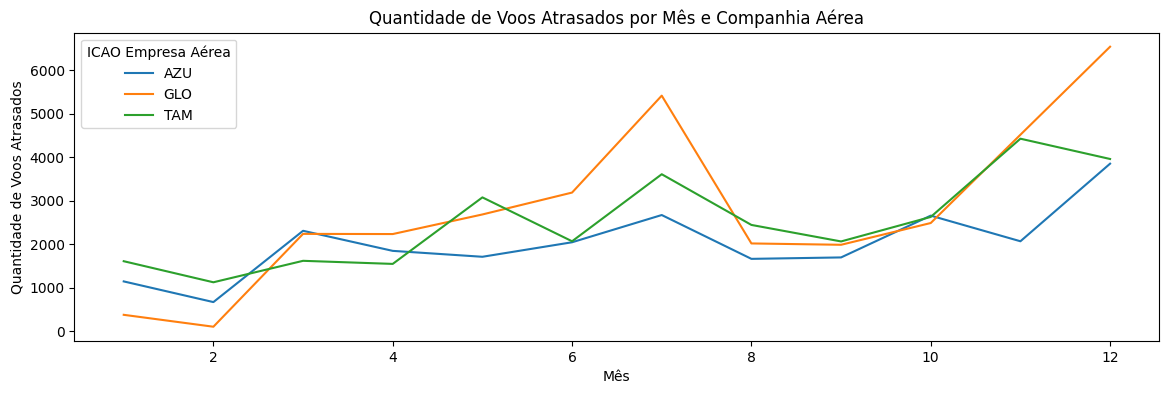

In [45]:
datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month

#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()

voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['Status horario voo'] == 1].groupby(['Mes_Partida', 'ICAO Empresa Aérea']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=voos_pontuais_por_mes_companhia)
plt.title('Quantidade de Voos Atrasados por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Atrasados')
plt.show()


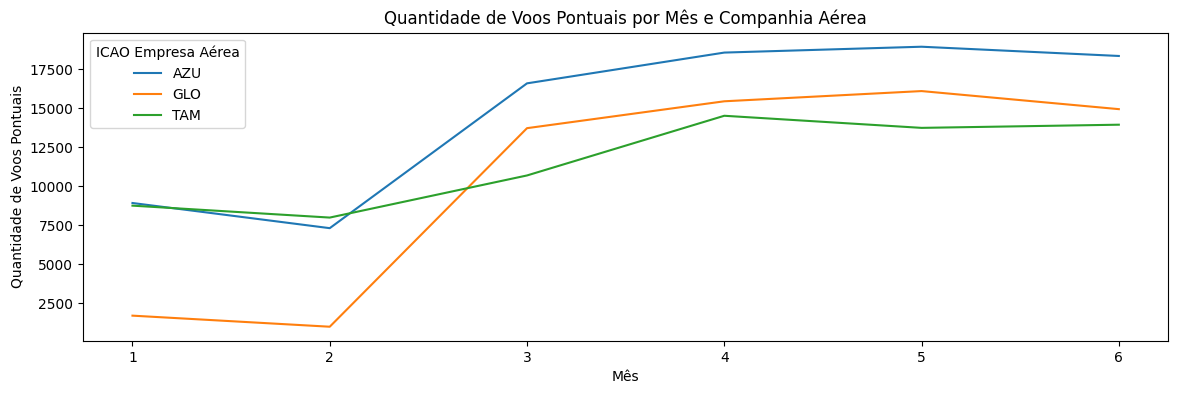

In [46]:
voos_primeiros_meses = datasets_voos_2018[datasets_voos_2018['Mes_Partida'].isin([1, 2, 3, 4, 5, 6])]

#datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month.isin([1, 2, 3])
#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()
voos_pontuais_por_mes_companhia = voos_primeiros_meses[voos_primeiros_meses['Status horario voo'] == 0].groupby(['Mes_Partida', 'ICAO Empresa Aérea']).size().reset_index(name='Quantidade_Pontuais')


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=voos_pontuais_por_mes_companhia)
plt.title('Quantidade de Voos Pontuais por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Pontuais')
plt.show()

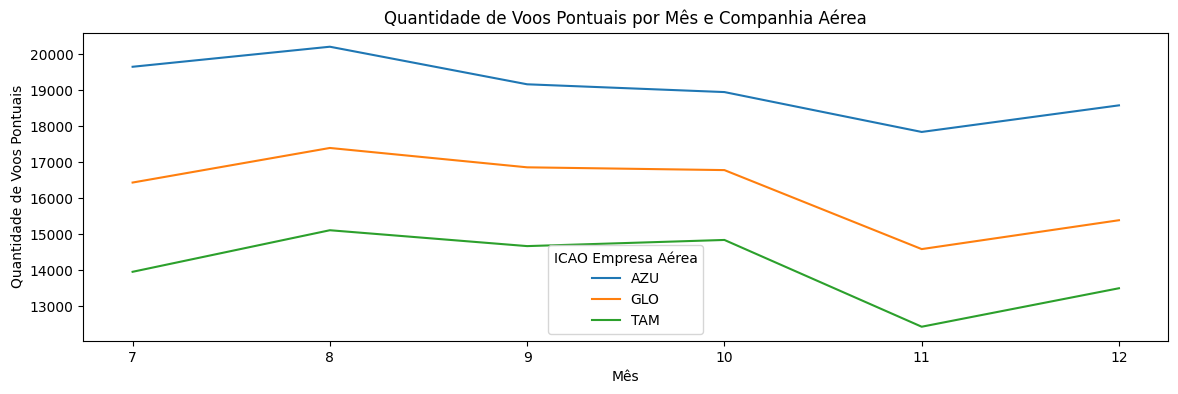

In [47]:
voos_primeiros_meses = datasets_voos_2018[datasets_voos_2018['Mes_Partida'].isin([7, 8, 9, 10, 11, 12])]

#datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month.isin([1, 2, 3])
#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()
voos_pontuais_por_mes_companhia = voos_primeiros_meses[voos_primeiros_meses['Status horario voo'] == 0].groupby(['Mes_Partida', 'ICAO Empresa Aérea']).size().reset_index(name='Quantidade_Pontuais')


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=voos_pontuais_por_mes_companhia)
plt.title('Quantidade de Voos Pontuais por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Pontuais')
plt.show()

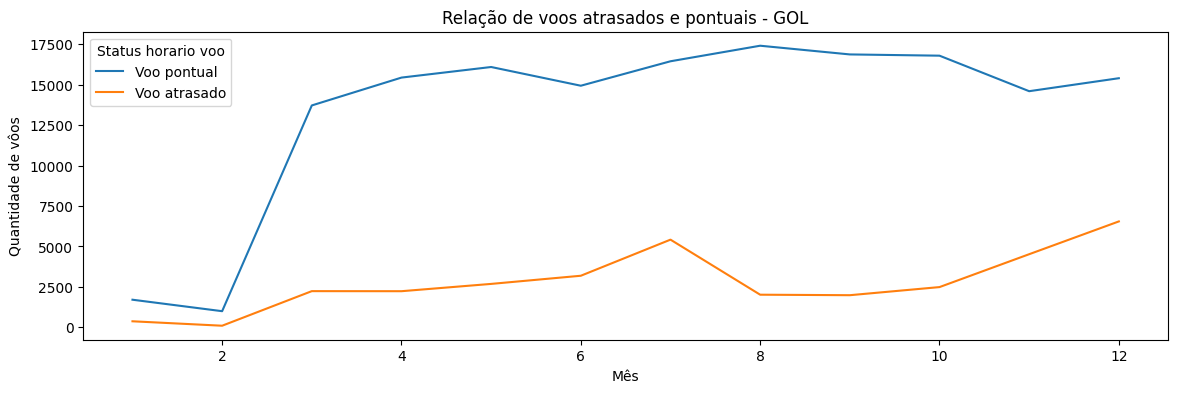

In [48]:
datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month

#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()

voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea'] == 'GLO'].groupby(['Mes_Partida', 'Status horario voo']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)
voos_pontuais_por_mes_companhia = voos_pontuais_por_mes_companhia.replace({'Status horario voo': {0: 'Voo pontual', 1: 'Voo atrasado'}})


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='Status horario voo', data=voos_pontuais_por_mes_companhia)
plt.title('Relação de voos atrasados e pontuais - GOL')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vôos')
plt.show()

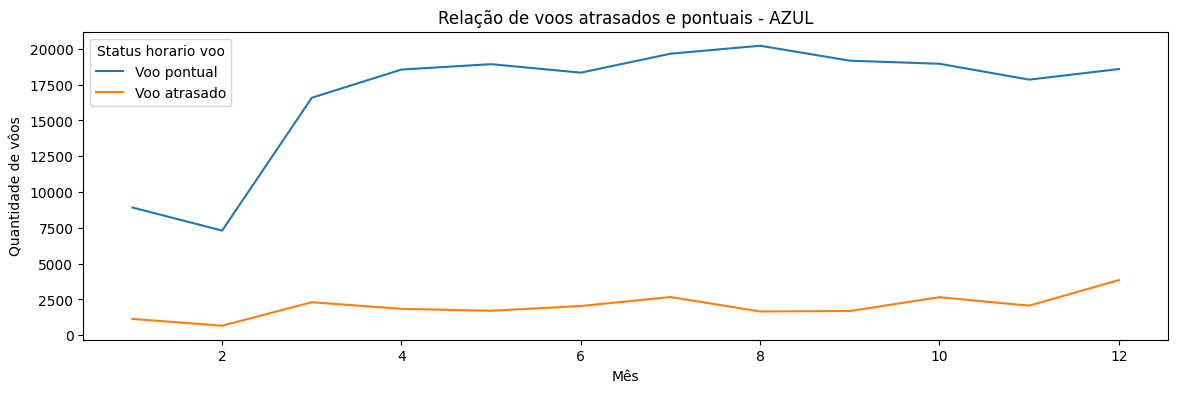

In [49]:
voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea'] == 'AZU'].groupby(['Mes_Partida', 'Status horario voo']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)
voos_pontuais_por_mes_companhia = voos_pontuais_por_mes_companhia.replace({'Status horario voo': {0: 'Voo pontual', 1: 'Voo atrasado'}})


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='Status horario voo', data=voos_pontuais_por_mes_companhia)
plt.title('Relação de voos atrasados e pontuais - AZUL')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vôos')
plt.show()

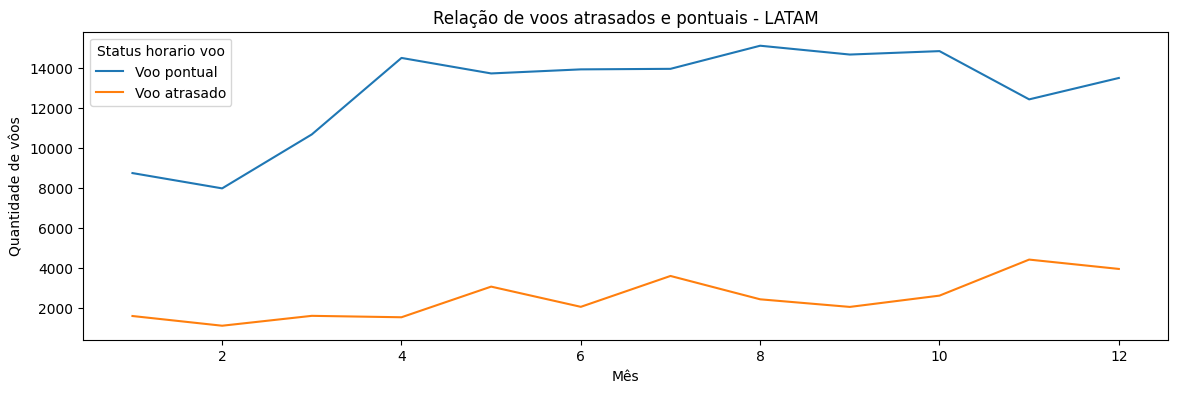

In [50]:
voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea'] == 'TAM'].groupby(['Mes_Partida', 'Status horario voo']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)
voos_pontuais_por_mes_companhia = voos_pontuais_por_mes_companhia.replace({'Status horario voo': {0: 'Voo pontual', 1: 'Voo atrasado'}})


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='Status horario voo', data=voos_pontuais_por_mes_companhia)
plt.title('Relação de voos atrasados e pontuais - LATAM')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vôos')
plt.show()

SERIES TEMPORAIS DO INDICADOR DE PONTUALIDADE

 voos 1 − (𝑣𝑜𝑜𝑠 𝑎𝑡𝑟𝑎𝑠𝑎𝑑𝑜𝑠/𝑣𝑜𝑜𝑠 𝑟𝑒𝑎𝑙𝑖𝑧𝑎𝑑𝑜) # Voo pontual(0)
 
O resultado da fórmula é uma porcentagem que representa a pontualidade dos voos. Quanto mais próximo de 1, maior é a pontualidade, e quanto mais próximo de 0, menor é a pontualidade.

Dados separadados da gol

In [76]:
total_voos_gol = len(datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea'] =='GLO'])
voos_atrasados_gol = len(datasets_voos_2018[(datasets_voos_2018['Status horario voo'] == 1) & (datasets_voos_2018['ICAO Empresa Aérea'] =='GLO')])

porcentagem_pontualidade_gol = 1 - (voos_atrasados_gol / total_voos_gol)
print(f'A porcentagem de voos pontuais é: {porcentagem_pontualidade_gol * 100:.2f}%')


A porcentagem de voos pontuais é: 82.59%


In [77]:
# Calcular a porcentagem de voos pontuais mensalmente para a empresa 'GLO'
porcentagens_pontualidade_mensal_gol= []

#dados_pontualidade_gol = pd.DataFrame(columns=['mes', 'porcentagem'])
for mes in range(1, 13):
    voos_atrasados_gol = len(datasets_voos_2018[
        (datasets_voos_2018['Status horario voo'] == 1) &
        (datasets_voos_2018['ICAO Empresa Aérea'] == 'GLO') &
        (datasets_voos_2018['Mes_Partida'] == mes)
    ])
    
    total_voos_mes_gol = len(datasets_voos_2018[datasets_voos_2018['Mes_Partida']==mes])
    porcentagem_pontualidade_mes_gol = 1 - (voos_atrasados_gol/total_voos_mes_gol)
    porcentagens_pontualidade_mensal_gol.append({'Indice de pontualidade': porcentagem_pontualidade_mes_gol, 'mes': mes, 'Companhia':'GOL'})


In [78]:
porcentagens_pontualidade_mensal_gol

[{'Indice de pontualidade': 0.9833399973343996, 'mes': 1, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9944474986256184, 'mes': 2, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9525304373647817, 'mes': 3, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9587228853331362, 'mes': 4, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9522428942406886, 'mes': 5, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9414905328049318, 'mes': 6, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9122494576304115, 'mes': 7, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9657158390105502, 'mes': 8, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9648069429684732, 'mes': 9, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9573717124989292, 'mes': 10, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.9191326439331592, 'mes': 11, 'Companhia': 'GOL'},
 {'Indice de pontualidade': 0.8941615870911414, 'mes': 12, 'Companhia': 'GOL'}]

In [79]:
df_pontualidade_gol = pd.DataFrame(porcentagens_pontualidade_mensal_gol, columns=['Indice de pontualidade', 'mes','Companhia'])


In [80]:
df_pontualidade_gol

,Indice de pontualidade,mes,Companhia
0,0.983340,1,GOL
1,0.994447,2,GOL
2,0.952530,3,GOL
3,0.958723,4,GOL
4,0.952243,5,GOL
5,0.941491,6,GOL
6,0.912249,7,GOL
7,0.965716,8,GOL
8,0.964807,9,GOL
9,0.957372,10,GOL


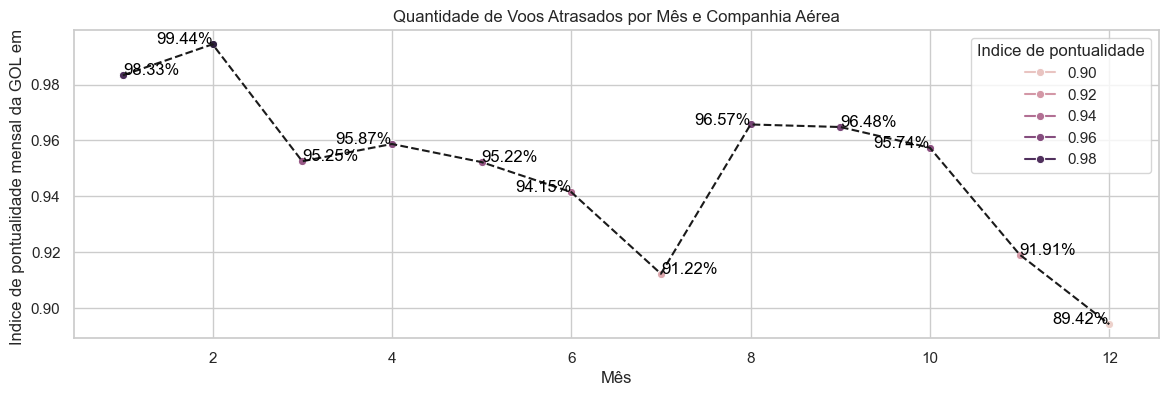

In [615]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 4))
plot= sns.lineplot(x='mes', y='Indice de pontualidade', hue='Indice de pontualidade', data=df_pontualidade_gol, marker='o')

for line in range(0, df_pontualidade_gol.shape[0]): 
    plot.text(df_pontualidade_gol['mes'][line], df_pontualidade_gol['Indice de pontualidade'][line],
              f'{df_pontualidade_gol["Indice de pontualidade"][line]*100:.2f}%', color='black',
              ha='left' if line % 2 == 0 else 'right')  # Alternar entre left e right para melhor visibilidade
plt.plot(df_pontualidade_gol['mes'], df_pontualidade_gol['Indice de pontualidade'], 'k--')


plt.title('Quantidade de Voos Atrasados por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Indice de pontualidade mensal da GOL em ')
plt.show()


In [1307]:
""""
total_voos = len(datasets_voos_2018)
voos_atrasados_gol = len(datasets_voos_2018[(datasets_voos_2018['Status horario voo'] == 1) & (datasets_voos_2018['ICAO Empresa Aérea'] =='GLO')])

porcentagem_pontualidade_anual = 1 - (voos_atrasados / total_voos)
print(f'A porcentagem de voos pontuais é: {porcentagem_pontualidade * 100:.2f}%')

"""

'"\ntotal_voos = len(datasets_voos_2018)\nvoos_atrasados_gol = len(datasets_voos_2018[(datasets_voos_2018[\'Status horario voo\'] == 1) & (datasets_voos_2018[\'ICAO Empresa Aérea\'] ==\'GLO\')])\n\nporcentagem_pontualidade_anual = 1 - (voos_atrasados / total_voos)\nprint(f\'A porcentagem de voos pontuais é: {porcentagem_pontualidade * 100:.2f}%\')\n\n'

LATAM

In [616]:
total_voos_latam = len(datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea'] =='TAM'])
voos_atrasados_tam = len(datasets_voos_2018[(datasets_voos_2018['Status horario voo'] == 1) & (datasets_voos_2018['ICAO Empresa Aérea'] =='TAM')])

porcentagem_pontualidade_tam = 1 - (voos_atrasados_tam /total_voos_latam)
print(f'O indice de pontualidade é: {porcentagem_pontualidade_tam * 100:.2f}%')





O indice de pontualidade é: 83.63%


In [617]:


# Calcular a porcentagem de voos pontuais mensalmente para a empresa 'GLO'
porcentagens_pontualidade_mensal_tam= []

#dados_pontualidade_gol = pd.DataFrame(columns=['mes', 'porcentagem'])
for mes in range(1, 13):
    voos_atrasados_latam = len(datasets_voos_2018[
        (datasets_voos_2018['Status horario voo'] == 1) &
        (datasets_voos_2018['ICAO Empresa Aérea'] == 'TAM') &
        (datasets_voos_2018['Mes_Partida'] == mes)
    ])

    total_voos_mes_latam = len(datasets_voos_2018[(datasets_voos_2018['Mes_Partida']==mes) & (datasets_voos_2018['ICAO Empresa Aérea'] == 'TAM')])

    porcentagem_pontualidade_mes = 1 - (voos_atrasados_latam/total_voos_mes_latam)
    porcentagens_pontualidade_mensal_tam.append({'Indice de pontualidade': porcentagem_pontualidade_mes, 'mes': mes, 'Companhia':'TAM'})

In [54]:
porcentagens_pontualidade_mensal_tam

[{'Indice de pontualidade': 0.8447061094488949, 'mes': 1, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.8766461808604038, 'mes': 2, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.8684873608063074, 'mes': 3, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.903637722685935, 'mes': 4, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.8168947055324212, 'mes': 5, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.8707742298319066, 'mes': 6, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.7945143117282194, 'mes': 7, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.8608279710722624, 'mes': 8, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.8767025089605734, 'mes': 9, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.8496137339055794, 'mes': 10, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.7373851171064334, 'mes': 11, 'Companhia': 'TAM'},
 {'Indice de pontualidade': 0.7731722677048147, 'mes': 12, 'Companhia': 'TAM'}]

In [74]:
df_pontualidade_tam = pd.DataFrame(porcentagens_pontualidade_mensal_tam, columns=['Indice de pontualidade', 'mes','Companhia'])

In [73]:
df_pontualidade_tam

,Indice de pontualidade,mes,Companhia
0,0.844706,1,TAM
1,0.876646,2,TAM
2,0.868487,3,TAM
3,0.903638,4,TAM
4,0.816895,5,TAM
5,0.870774,6,TAM
6,0.794514,7,TAM
7,0.860828,8,TAM
8,0.876703,9,TAM
9,0.849614,10,TAM


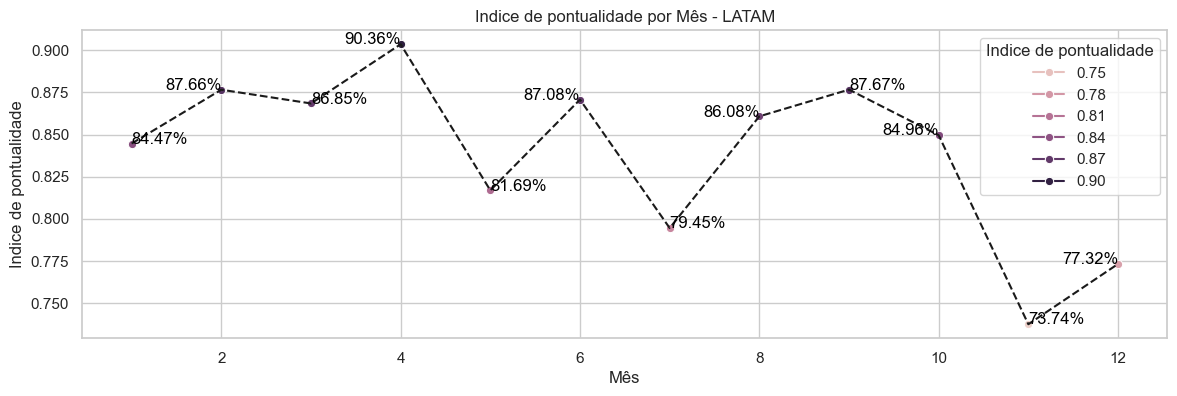

In [618]:

sns.set(style="whitegrid")
plt.figure(figsize=(14, 4))

plot = sns.lineplot(x='mes', y='Indice de pontualidade', hue='Indice de pontualidade', data= df_pontualidade_tam, marker='o')

for line in range(0, df_pontualidade_tam.shape[0]): 
    plot.text(df_pontualidade_tam['mes'][line], df_pontualidade_tam['Indice de pontualidade'][line],
              f'{df_pontualidade_tam["Indice de pontualidade"][line]*100:.2f}%', color='black',
              ha='left' if line % 2 == 0 else 'right')  # Alternar entre left e right para melhor visibilidade
plt.plot(df_pontualidade_tam['mes'], df_pontualidade_tam['Indice de pontualidade'], 'k--')


plt.title('Indice de pontualidade por Mês - LATAM')
plt.xlabel('Mês')
plt.ylabel('Indice de pontualidade')
plt.show()

AZUL

In [58]:
total_voos_azul = len(datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea'] =='AZU'])
voos_atrasados_azul= len(datasets_voos_2018[(datasets_voos_2018['Status horario voo'] == 1) & (datasets_voos_2018['ICAO Empresa Aérea'] =='AZU')])

porcentagem_pontualidade_azul = 1 - (voos_atrasados_azul/ total_voos_azul)
print(f'O indice de pontualidade anual é: {porcentagem_pontualidade_azul * 100:.2f}%')




O indice de pontualidade anual é: 89.30%


In [59]:
# Calcular a porcentagem de voos pontuais mensalmente para a empresa 'GLO'
porcentagens_pontualidade_mensal_azul= []

#dados_pontualidade_gol = pd.DataFrame(columns=['mes', 'porcentagem'])
for mes in range(1, 13):
    voos_atrasados_azul = len(datasets_voos_2018[
        (datasets_voos_2018['Status horario voo'] == 1) &
        (datasets_voos_2018['ICAO Empresa Aérea'] == 'AZU') &
        (datasets_voos_2018['Mes_Partida'] == mes)
    ])
    
    total_voos_mes_azul= len(datasets_voos_2018[(datasets_voos_2018['Mes_Partida']==mes) & (datasets_voos_2018['ICAO Empresa Aérea'] == 'AZU')])
    porcentagem_pontualidade_mes_azul = 1 - (voos_atrasados_azul/total_voos_mes_azul)
    porcentagens_pontualidade_mensal_azul.append({'Indice de pontualidade': porcentagem_pontualidade_mes_azul, 'mes': mes, 'Companhia':'AZUL'})

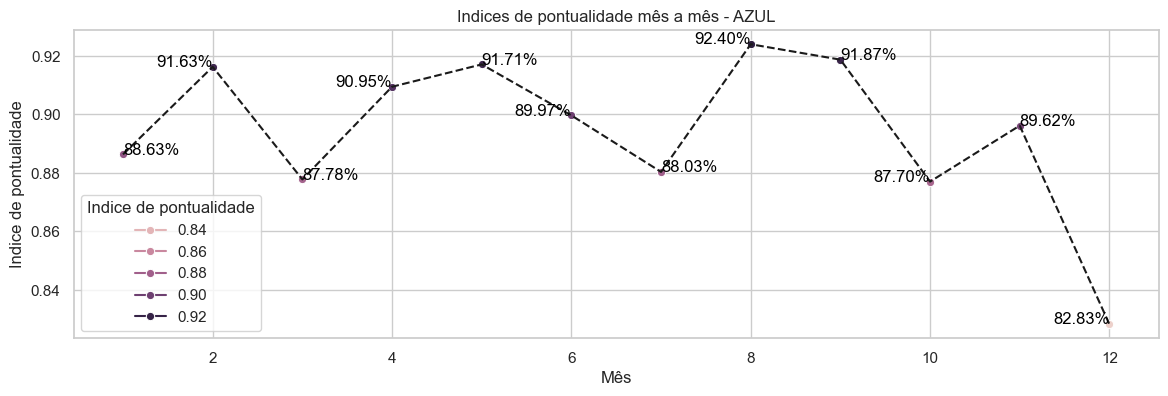

In [71]:
df_pontualidade_azul = pd.DataFrame(porcentagens_pontualidade_mensal_azul, columns=['Indice de pontualidade', 'mes','Companhia'])

sns.set(style="whitegrid")
plt.figure(figsize=(14, 4))
plot = sns.lineplot(x='mes', y='Indice de pontualidade', hue='Indice de pontualidade', data= df_pontualidade_azul, marker='o')
for line in range(0, df_pontualidade_azul.shape[0]):
    plot.text(df_pontualidade_azul['mes'][line], df_pontualidade_azul['Indice de pontualidade'][line],
              f'{df_pontualidade_azul["Indice de pontualidade"][line]*100:.2f}%', color='black',
              ha='left' if line % 2 == 0 else 'right')  # Alternar entre left e right para melhor visibilidade
plt.plot(df_pontualidade_azul['mes'], df_pontualidade_azul['Indice de pontualidade'], 'k--')
plt.title('Indices de pontualidade mês a mês - AZUL')
plt.xlabel('Mês')
plt.ylabel('Indice de pontualidade')
plt.show()

In [70]:
df_pontualidade_azul

,Indice de pontualidade,mes,Companhia
0,0.886339,1,AZUL
1,0.916270,2,AZUL
2,0.877779,3,AZUL
3,0.909461,4,AZUL
4,0.917099,5,AZUL
5,0.899661,6,AZUL
6,0.880346,7,AZUL
7,0.923991,8,AZUL
8,0.918727,9,AZUL
9,0.877024,10,AZUL


INDICES DE PONTUALIDADE - COMPARATIVO MÊS A MÊS - TODAS AS COMPANHIAS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<BarContainer object of 3 artists>

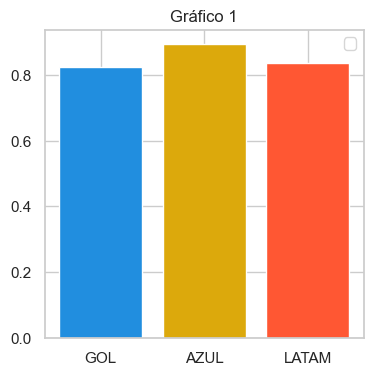

In [69]:
#porcentagem_pontualidade_gol
#porcentagem_pontualidade_azul
#porcentagem_pontualidade_tam

valoresy = [porcentagem_pontualidade_gol, porcentagem_pontualidade_azul, porcentagem_pontualidade_tam]
valoresx = ['GOL', 'AZUL','LATAM']

figura = plt.figure(figsize=(14,4))
#figura.subtitle('Título Geral')


figura.add_subplot(131)
#plt.plot(valoresx, valoresy, label = ' Um dado qualquer')
plt.legend()
plt.title('Gráfico 1')
plt.bar(valoresx,valoresy, color=['#218EDF', '#DCA90C', '#FF5733'])

In [84]:
df_pontualidade_2018 = pd.concat([df_pontualidade_azul, df_pontualidade_gol, df_pontualidade_tam], ignore_index= True)

In [85]:
df_pontualidade_2018

,Indice de pontualidade,mes,Companhia
0,0.886339,1,AZUL
1,0.916270,2,AZUL
2,0.877779,3,AZUL
3,0.909461,4,AZUL
4,0.917099,5,AZUL
5,0.899661,6,AZUL
6,0.880346,7,AZUL
7,0.923991,8,AZUL
8,0.918727,9,AZUL
9,0.877024,10,AZUL


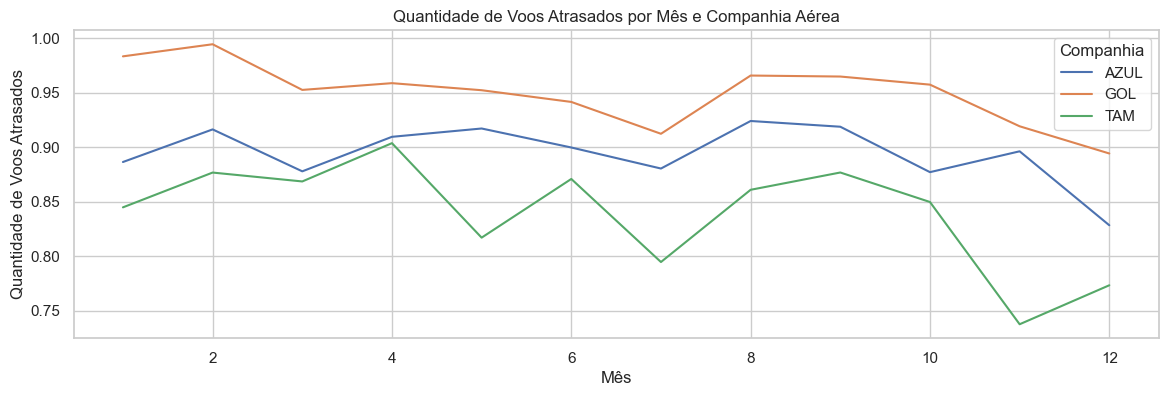

In [99]:
df_pontualidade_2018
#indice_pontualidade = df_pontualidade_2018.groupby(['mes', 'Companhia']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)

plt.figure(figsize=(14, 4))
sns.lineplot(x='mes', y='Indice de pontualidade', hue='Companhia', data=df_pontualidade_2018)
plt.title('Quantidade de Voos Atrasados por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Atrasados')
plt.show()

MAIOR NUMERO DE ATRASO MENSAL POR AEROPORTO DE ORIGEM DE CADA COMPANHIA AEREA

In [1134]:

#datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea']== 'TAM']['Status horario voo'].value_counts()
atrasos_mes_poraerodromo = datasets_voos_2018[datasets_voos_2018['Status horario voo'] == 1].groupby(['Mes_Partida', 'ICAO Empresa Aérea','ICAO Aeródromo Origem']).size().reset_index(name='Quantidade_Atrasados')

df_atrasos_mes_poraerodromo = atrasos_mes_poraerodromo.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])['ICAO Aeródromo Origem'].value_counts().reset_index(name='Quantidade_Ocorrencias')

In [1135]:
df_atrasos_mes_poraerodromo


,Mes_Partida,ICAO Empresa Aérea,ICAO Aeródromo Origem,Quantidade_Ocorrencias
0,1,AZU,SBBE,1
1,1,AZU,SBBR,1
2,1,AZU,SBMG,1
3,1,AZU,SBMA,1
4,1,AZU,SBLO,1
...,...,...,...,...
2093,12,TAM,SBJA,1
2094,12,TAM,SBIZ,1
2095,12,TAM,SBIL,1
2096,12,TAM,SBGR,1


In [1159]:
idx_max = atrasos_mes_poraerodromo.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])['Quantidade_Atrasados'].idxmax()

maiores_atrasos_por_mes_poraerodromo = atrasos_mes_poraerodromo.loc[idx_max]

maiores_atrasos_por_mes_poraerodromo['ICAO Empresa Aérea'].replace({'AZU': 'AZUL', 'TAM': 'LATAM', 'GLO': 'GOL'}, inplace=True)

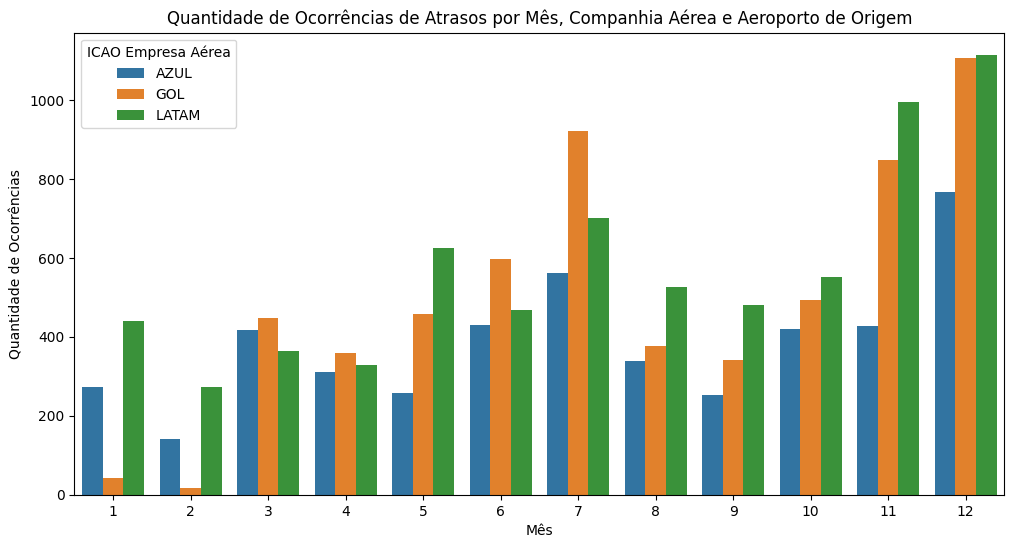

In [1239]:
plt.figure(figsize=(12, 6))
ax =sns.barplot(x='Mes_Partida', y='Quantidade_Atrasados', hue='ICAO Empresa Aérea', data=maiores_atrasos_por_mes_poraerodromo)
#handles, labels = ax.get_legend_handles_labels()

# Adicionar rótulos 'ICAO Aeródromo Origem' às legendas


#plt.legend(handles, labels, title='Companhia Aérea')
plt.title('Quantidade de Ocorrências de Atrasos por Mês, Companhia Aérea e Aeroporto de Origem')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Ocorrências')
plt.show()

In [ ]:

#datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month
#datasets_voos_2018[(datasets_voos_2018['ICAO Empresa Aérea']== 'AZU') &(datasets_voos_2018['Status horario voo'] == 1)]



Text(0.5, 1.0, 'Status de voos por compania - Gol')

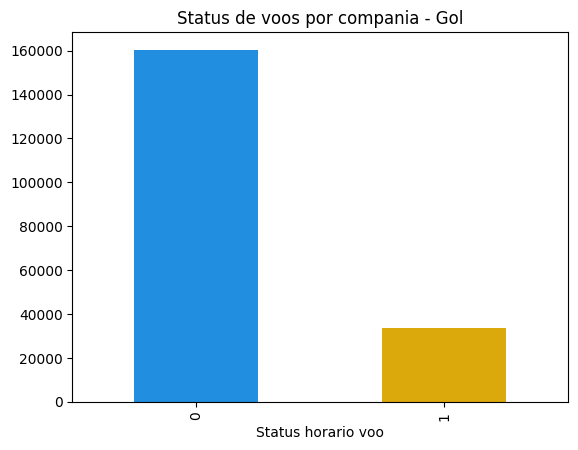

<Figure size 800x400 with 0 Axes>

In [1016]:
plot = datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea']== 'GLO']['Status horario voo'].value_counts().plot(kind="bar", color = ['#218EDF','#DCA90C'])
plt.figure(figsize=(8,4), )
plot.set_title("Status de voos por compania - Gol")

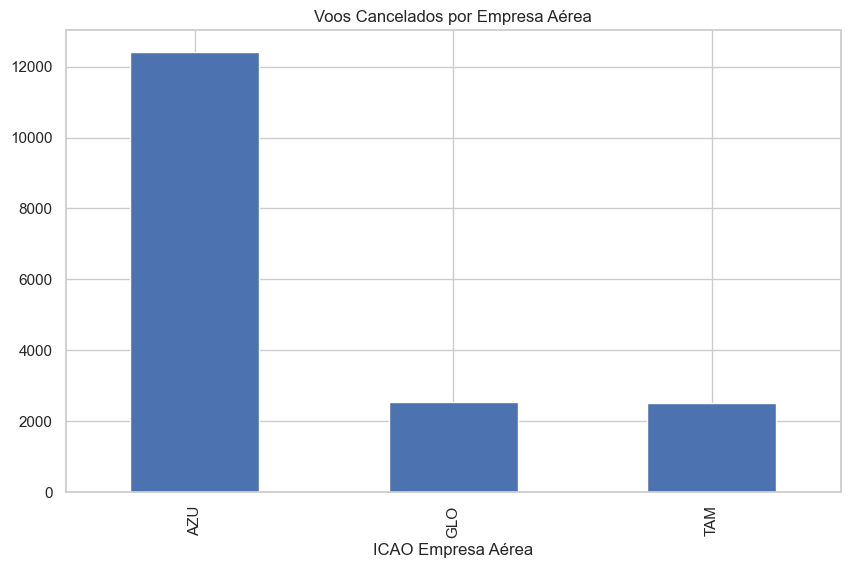

In [63]:
#fazer uma projeção mensal 
voos_cancelados = datasets2018_original[datasets2018_original['Situação Voo'] == 'CANCELADO']
if not voos_cancelados.empty:
    plt.figure(figsize=(10, 6))
    plot = voos_cancelados['ICAO Empresa Aérea'].value_counts().plot(kind="bar")
    plot.set_title("Voos Cancelados por Empresa Aérea")
    plt.show()
else:
    print("Não há voos cancelados para exibir.")

Text(0.5, 1.0, 'voos por COMPANHIA por Aerodromo de partida - GOL ')

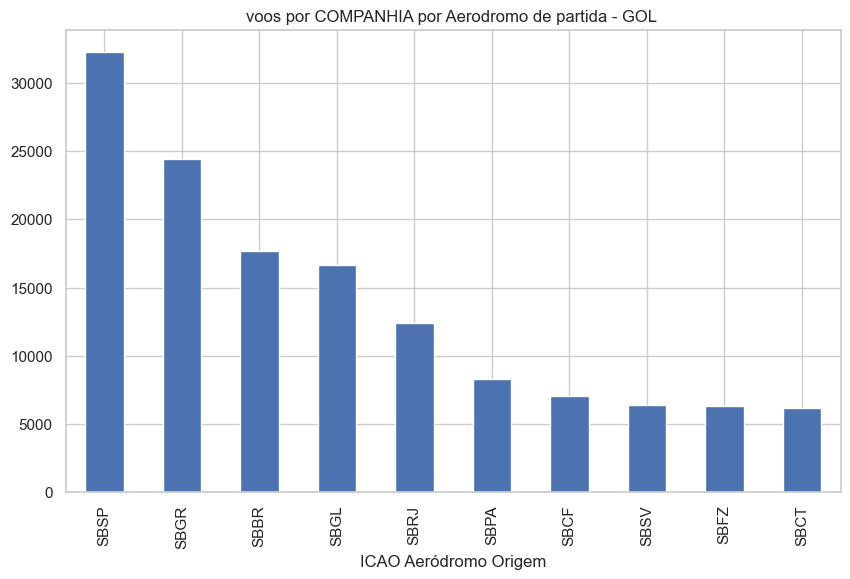

In [66]:
voos_efetivados = datasets_voos_2018[(datasets_voos_2018['Situação Voo'] == 'REALIZADO')& (datasets_voos_2018['ICAO Empresa Aérea']=='GLO')]

plt.figure(figsize=(10,6))
plot = voos_efetivados['ICAO Aeródromo Origem'].value_counts().head(10).plot(kind="bar")

plot.set_title("voos por COMPANHIA por Aerodromo de partida - GOL ")



Text(0.5, 1.0, 'voos por COMPANHIA por Aerodromo de partida - TAM ')

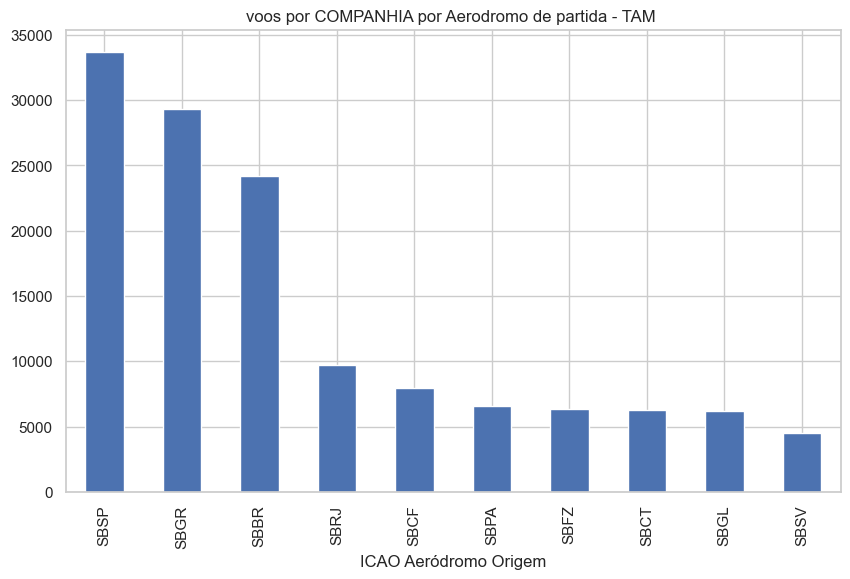

In [67]:
voos_efetivados = datasets_voos_2018[(datasets_voos_2018['ICAO Empresa Aérea']=='TAM') & (datasets_voos_2018['Situação Voo'] == 'REALIZADO')]
#lista_datasets2018['Situação Voo'] == 'REALIZADO'
plt.figure(figsize=(10,6))
plot = voos_efetivados['ICAO Aeródromo Origem'].value_counts().head(10).plot(kind="bar")

plot.set_title("voos por COMPANHIA por Aerodromo de partida - TAM ")

Text(0.5, 1.0, 'voos por COMPANHIA por Aerodromo de partida - AZUL')

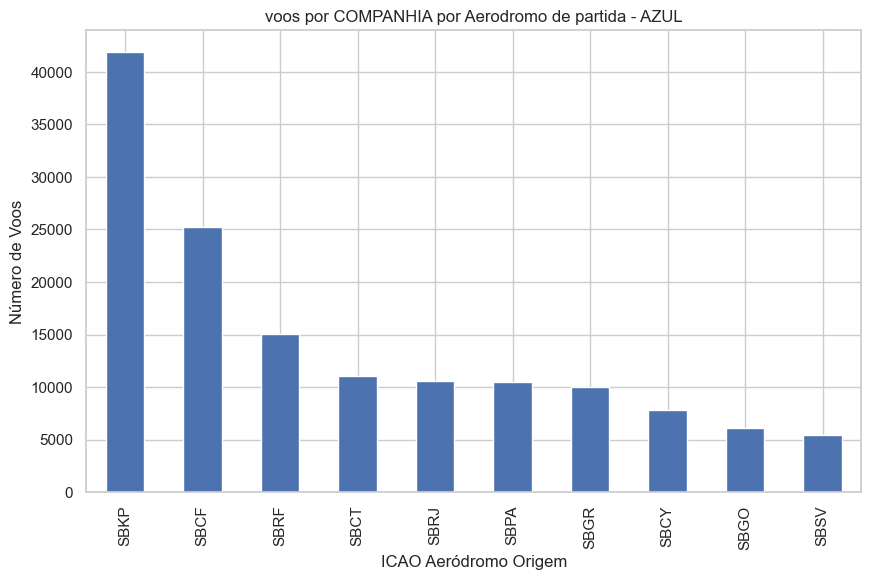

In [100]:
voos_efetivados = datasets_voos_2018[(datasets_voos_2018['Situação Voo'] == 'REALIZADO') & (datasets_voos_2018['ICAO Empresa Aérea']=='AZU')]
#
plt.figure(figsize=(10,6))
plot = voos_efetivados['ICAO Aeródromo Origem'].value_counts().head(10).plot(kind="bar")
plot.set_ylabel("Número de Voos")
plot.set_title("voos por COMPANHIA por Aerodromo de partida - AZUL")

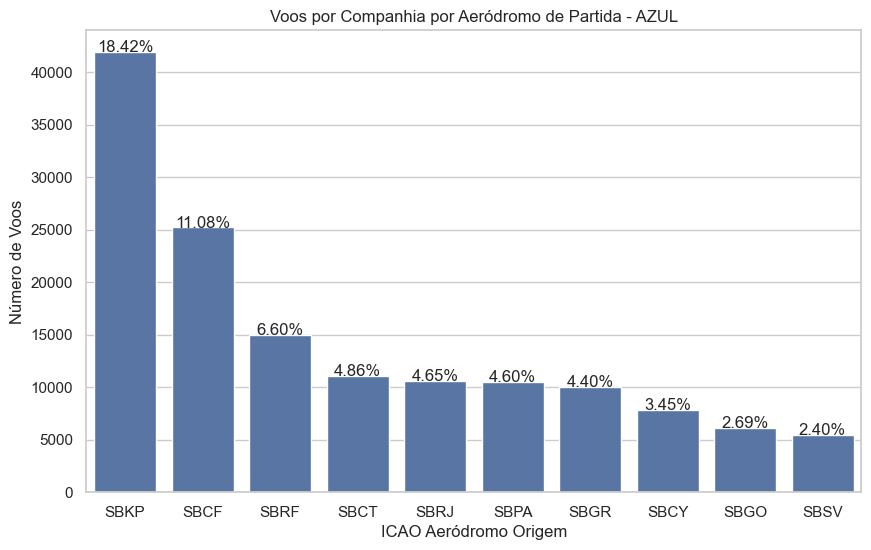

In [101]:

voos_efetivados = datasets_voos_2018[(datasets_voos_2018['ICAO Empresa Aérea'] == 'AZU') & (datasets_voos_2018['Situação Voo'] == 'REALIZADO')]

# Obtém os 10 principais valores do ICAC Aeródromo Origem
top_aerodromos = voos_efetivados['ICAO Aeródromo Origem'].value_counts().head(10)
#voos_realizados


# Cria o gráfico de barras com seaborn
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=top_aerodromos.index, y=top_aerodromos.values)

# Adiciona rótulo ao eixo y
plt.ylabel("Número de Voos")

# Adiciona título ao gráfico
plt.title("Voos por Companhia por Aeródromo de Partida - AZUL")

# Adiciona porcentagens às legendas
total = len(voos_efetivados['ICAO Aeródromo Origem'])
for i, value in enumerate(top_aerodromos):
    percent = value / total * 100
    plt.text(i, value + 0.5, f'{percent:.2f}%', ha="center")

# Exibe o gráfico
plt.show()

Text(0.5, 1.0, 'voos por Aerodromo de destino - VISÃO GERAL ')

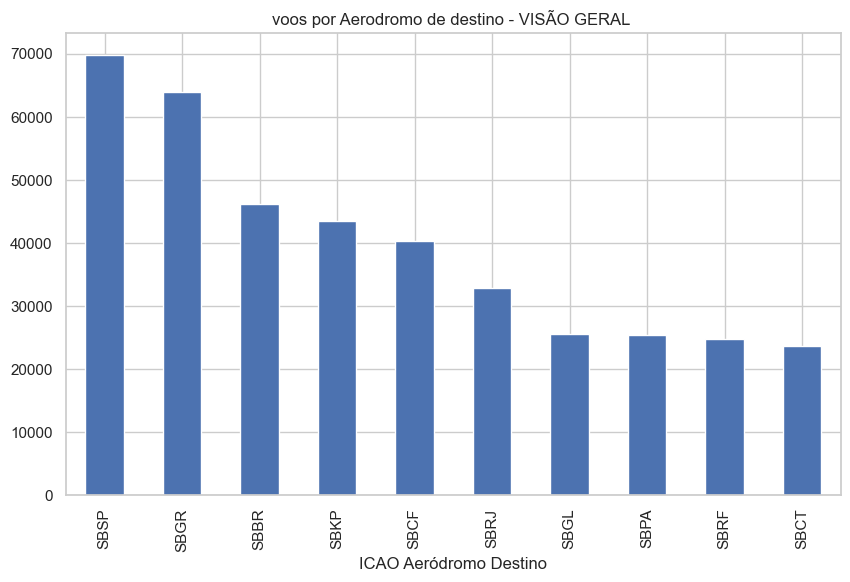

In [102]:
voos_efetivados = datasets_voos_2018[datasets_voos_2018['Situação Voo'] == 'REALIZADO']
plt.figure(figsize=(10,6))
plot = voos_efetivados['ICAO Aeródromo Destino'].value_counts().head(10).plot(kind="bar")

plot.set_title("voos por Aerodromo de destino - VISÃO GERAL ")

violinplot para nalise de distribuição de horarios

In [ ]:
#criando nova coluna a partir da difrença das colunas Partida Real e Partida Prevista em minutos.
#df_modelo_voos2018['tempo_diferenca_partida'] = (datasets_voos_2018['Partida Real'] - datasets_voos_2018['Partida Prevista']).dt.total_seconds()/60

In [135]:
#criando nova coluna a partir da difrença das colunas Chegada Real e Chegada Prevista em minutos.
#df_modelo_voos2018['tempo_diferenca_chegada'] = (datasets_voos_2018['Chegada Real'] - datasets_voos_2018['Chegada Prevista']).dt.total_seconds()/60

52438    10.0
dtype: float64

-Modelo de predição - Modelagem e avaliação

Nesta etapa faremos a construção de um modelo de classificação para prever se aquele voo específico da base dados irá atrasar ou nao. Para isso, precisaremos criar uma nova coópia dos dados fazendo com que conservemos os dados originais e os dados usados para análise.
    O conjunto de dados 'datasets_voos_2018', que já passou pela etapa de pré-processamento, será usado para fazer a cópia. A cópia será necessaria pois criaremos novas features baseadas em informações anteriores como data, horaio de saída do voo. As novas colunas nos drão informações como *tempo de atraso e diferença de horaio de chegada*


base irá atrasar ou não

- Feature Engineering - criação de colunas com informação sobre o tempo de atraso em minutos ou segundos
- Implementar um modelo de classificação para prever se aquele voo específico da 
base irá atrasar ou não (utilizando apenas dados do ano de 2018)

- 1 - Criando novas colunas com dados temporais

A primeira nova coluna será a coluna 'tempo_diferenca_partida', ela será construída a partir do calculo da diferença entre Partida Real e Partida Prevista (Partida Real - Partida Prevista), isso nos ajudará a conhecer o tempo de atrasado entre os voos.

e para ajudar ainda nas nossas analises, criaremos a coluna 'tempo_diferenca_cheaga', que segue a mesma logica da coluna 'tempo_diferenca_partida' e é calculada com as colunas de chaga prevista e real.

#hora_diferença = (diferenca_hora_df['Partida Real'] - diferenca_hora_df['Partida Prevista']).dt.total_seconds()

o conjunto 'df_modelo_voos2018' será o conjunto de dados usado na criação do modelo

In [521]:
#acriando o conjunto de dados 'df_modelo_voos2018' que será usado na criação do modelo
df_modelo_voos2018 = datasets_voos_2018.copy()

Para garantir que as colunas estejam na mesma escala, optamos por deixar as colunas em escala de minutos.
Em algumas linhas, pode ser que o resultado seja (0), o que indica que a Partida real e partida prevista são iguais; pode ser negativo('diferenca_partida_prevista' < 0 ), o que indica que ele saiu antes da hora ou mesmo se enquadra como pontual.

a manipulação de dados usando a função total_seconds()/60 é necessaria para tranformar o resultado inicial, dado em segundos, minutos.

Separando as colunas do tipo datetime em colunas com dados 'hora', 'minuto', 'segundos'; 'ano','mes','dia'

In [522]:
df_modelo_voos2018['hora_partida_prevista'] = df_modelo_voos2018['Partida Prevista'].dt.hour 
df_modelo_voos2018['minuto_partida_prevista'] = df_modelo_voos2018['Partida Prevista'].dt.minute 
df_modelo_voos2018['segundo_partida_prevista'] = df_modelo_voos2018['Partida Prevista'].dt.second 
df_modelo_voos2018['dia_partida_prevista'] = df_modelo_voos2018['Partida Prevista'].dt.day 

In [523]:
df_modelo_voos2018['hora_chegada_prevista'] = df_modelo_voos2018['Chegada Prevista'].dt.hour 
df_modelo_voos2018['minuto_chegada_prevista'] = df_modelo_voos2018['Chegada Prevista'].dt.minute 

df_modelo_voos2018['segundo_chegada_prevista'] = df_modelo_voos2018['Chegada Prevista'].dt.second 
df_modelo_voos2018['dia_chegada_prevista'] = df_modelo_voos2018['Chegada Prevista'].dt.day 


In [524]:
df_modelo_voos2018.columns

Index(['ICAO Empresa Aérea', 'Número Voo', 'Código Autorização (DI)',
       'Código Tipo Linha', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real',
       'Situação Voo', 'Status horario voo', 'Mes_Partida',
       'hora_partida_prevista', 'minuto_partida_prevista',
       'segundo_partida_prevista', 'dia_partida_prevista',
       'hora_chegada_prevista', 'minuto_chegada_prevista',
       'segundo_chegada_prevista', 'dia_chegada_prevista'],
      dtype='object')

In [525]:
df_modelo_voos2018.drop(['Número Voo', 'Código Autorização (DI)','Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real',
       'Código Tipo Linha', 'ICAO Aeródromo Origem','ICAO Aeródromo Destino','Situação Voo'], axis=1, inplace=True)

In [526]:
df_modelo_voos2018['ICAO Empresa Aérea'] = df_modelo_voos2018['ICAO Empresa Aérea'].astype('category')
df_modelo_voos2018 = pd.get_dummies(df_modelo_voos2018)


In [527]:

df_modelo_voos2018.drop('segundo_partida_prevista', axis=1, inplace=True)

In [528]:
df_modelo_voos2018.isnull().sum()

Status horario voo          0
Mes_Partida                 0
hora_partida_prevista       0
minuto_partida_prevista     0
dia_partida_prevista        0
hora_chegada_prevista       0
minuto_chegada_prevista     0
segundo_chegada_prevista    0
dia_chegada_prevista        0
ICAO Empresa Aérea_AZU      0
ICAO Empresa Aérea_GLO      0
ICAO Empresa Aérea_TAM      0
dtype: int64

Instanciando um modelo - Regressão logistica
 - porque a regressão logistica ?
 

De modo inicial, faremos a remoção de variaveis nominais e construiremos o modelo baseado em variaveis nao nominais. A remoção é dada a partir da hipotese/possibilidade de analisar a as variais temporais e sua influência na eficiencia do modelo de regressão logistica.

In [529]:
y = df_modelo_voos2018['Status horario voo']
X = df_modelo_voos2018.drop('Status horario voo', axis=1)

Fazendo a separação do conjunto de dados em conjuntos de treino e teste. Usaremos uma proporção de 20% dos dados para teste/avaliação do modelo 

In [604]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=800)

Como no nosso conjunto de dados a variável dependente não está distribuída uniformemente, faremos uso do class_weight='balanced'

In [605]:
#Instanciando o modelo 
lr_model1 = LogisticRegression(class_weight='balanced',max_iter=1000)
# Treinando o modelo
lr_model1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [606]:
accuracy = cross_val_score(lr_model1, X_train, y_train,scoring='accuracy')
accuracy.mean()

0.5693705372965667

In [607]:
y_pred_lr = lr_model1.predict(X_test)

In [608]:

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69    155406
           1       0.19      0.61      0.29     26361

    accuracy                           0.57    181767
   macro avg       0.54      0.58      0.49    181767
weighted avg       0.79      0.57      0.63    181767



Para evitar overfitting do modelo, usaremos a validação cruzada estratificada k-fold no conjunto de dados de treinamento. Começaremos usando 10 dobras e ajustaremos de acordo se o tempo de cálculo do modelo for muito longo.

In [ ]:
kfold = StratifiedKFold(n_splits=10, random_state=888)

lr_model = LogisticRegressionCV(cv=kfold,class_weight='balanced',random_state=888)
lr_model.fit(X_train,y_train)

testando mes como uma categoria

In [550]:
df_modelo_voos2018_mes = df_modelo_voos2018.copy()

In [591]:
df_modelo_voos2018_mes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605888 entries, 15 to 631626
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Status horario voo        605888 non-null  int32
 1   hora_partida_prevista     605888 non-null  int32
 2   minuto_partida_prevista   605888 non-null  int32
 3   dia_partida_prevista      605888 non-null  int32
 4   hora_chegada_prevista     605888 non-null  int32
 5   minuto_chegada_prevista   605888 non-null  int32
 6   segundo_chegada_prevista  605888 non-null  int32
 7   dia_chegada_prevista      605888 non-null  int32
 8   ICAO Empresa Aérea_AZU    605888 non-null  bool 
 9   ICAO Empresa Aérea_GLO    605888 non-null  bool 
 10  ICAO Empresa Aérea_TAM    605888 non-null  bool 
 11  Mes_Partida_1             605888 non-null  bool 
 12  Mes_Partida_2             605888 non-null  bool 
 13  Mes_Partida_3             605888 non-null  bool 
 14  Mes_Partida_4           

In [589]:
df_modelo_voos2018_mes['Mes_Partida'] = df_modelo_voos2018_mes['Mes_Partida'].astype('category')

In [590]:
df_modelo_voos2018_mes = pd.get_dummies(df_modelo_voos2018_mes)

In [554]:
y2 = df_modelo_voos2018_mes['Status horario voo']
X2 = df_modelo_voos2018_mes.drop('Status horario voo', axis=1)

In [555]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=800)

In [556]:
#Instanciando o modelo 
lr_model2= LogisticRegression(class_weight='balanced',max_iter=1000)
# Treinando o modelo
lr_model2.fit(X_train2, y_train2)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [541]:
accuracy2 = cross_val_score(lr_model2, X_train2, y_train2,scoring='accuracy')
accuracy2.mean()

0.600713828887376

In [496]:
y_pred_lr2 = lr_model2.predict(X_test2)
print(classification_report(y_test2, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72    103606
           1       0.20      0.60      0.30     17572

    accuracy                           0.60    121178
   macro avg       0.55      0.60      0.51    121178
weighted avg       0.80      0.60      0.66    121178



Adicionando o aeroporto

In [592]:
df_modelo_voos2018_erodromo = df_modelo_voos2018_mes.copy()

In [593]:
df_modelo_voos2018_erodromo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605888 entries, 15 to 631626
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Status horario voo        605888 non-null  int32
 1   hora_partida_prevista     605888 non-null  int32
 2   minuto_partida_prevista   605888 non-null  int32
 3   dia_partida_prevista      605888 non-null  int32
 4   hora_chegada_prevista     605888 non-null  int32
 5   minuto_chegada_prevista   605888 non-null  int32
 6   segundo_chegada_prevista  605888 non-null  int32
 7   dia_chegada_prevista      605888 non-null  int32
 8   ICAO Empresa Aérea_AZU    605888 non-null  bool 
 9   ICAO Empresa Aérea_GLO    605888 non-null  bool 
 10  ICAO Empresa Aérea_TAM    605888 non-null  bool 
 11  Mes_Partida_1             605888 non-null  bool 
 12  Mes_Partida_2             605888 non-null  bool 
 13  Mes_Partida_3             605888 non-null  bool 
 14  Mes_Partida_4           

In [594]:
df_modelo_voos2018_erodromo['ICAO Aeródromo Origem'] = datasets_voos_2018['ICAO Aeródromo Origem']


In [595]:
df_modelo_voos2018_erodromo['ICAO Aeródromo Origem'] = df_modelo_voos2018_erodromo['ICAO Aeródromo Origem'].astype('category')

In [596]:
df_modelo_voos2018_erodromo = pd.get_dummies(df_modelo_voos2018_erodromo)

In [597]:
df_modelo_voos2018_erodromo.shape

(605888, 135)

In [598]:
y3 = df_modelo_voos2018_erodromo['Status horario voo']
X3 = df_modelo_voos2018_erodromo.drop('Status horario voo', axis=1)

X_train3, X_test23, y_train23, y_test23 = train_test_split(X3,y3,test_size=0.2,random_state=800)

In [600]:
#Instanciando o modelo 
lr_model2= LogisticRegression(class_weight='balanced',max_iter=1000)
# Treinando o modelo
lr_model2.fit(X_train2, y_train2)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [601]:
accuracy2 = cross_val_score(lr_model2, X_train2, y_train2,scoring='accuracy')
accuracy2.mean()

0.568898929256669

In [602]:
y_pred_lr2 = lr_model2.predict(X_test2)
print(classification_report(y_test2, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69    103606
           1       0.19      0.61      0.29     17572

    accuracy                           0.57    121178
   macro avg       0.54      0.59      0.49    121178
weighted avg       0.79      0.57      0.63    121178

